1. Which batsmen scored the most runs in IPL 2023?
2. What was the strike rate distribution among players?
3. Who were the most aggressive boundary hitters (4s & 6s)?
4. How does batting position affect average runs scored?
5. How consistent were players (Out vs Not Out counts)?
6. Which team had the highest total contribution from batsmen?
7. What is the relationship between balls faced and strike rate?
8. What share of total 6s did each team hit in IPL 2023?
9. How do Shubman Gill and Ruturaj Gaikwad compare in terms of run consistency across matches
10. What is each team’s contribution to total runs in IPL 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Batting_PerMatchData_IPL_2023.csv')

In [5]:
print(df.head())

                                   match          teamInnings  battingPos  \
0  Chennai Super Kings Vs Gujarat Titans  Chennai Super Kings           1   
1  Chennai Super Kings Vs Gujarat Titans  Chennai Super Kings           2   
2  Chennai Super Kings Vs Gujarat Titans  Chennai Super Kings           3   
3  Chennai Super Kings Vs Gujarat Titans  Chennai Super Kings           4   
4  Chennai Super Kings Vs Gujarat Titans  Chennai Super Kings           5   

       batsmanName  runs  balls   4s   6s      SR out/not_out match_id  
0     Devon Conway   1.0    6.0  0.0  0.0   16.66         out    I23M1  
1  Ruturaj Gaikwad  92.0   50.0  4.0  9.0  184.00         out    I23M1  
2        Moeen Ali  23.0   17.0  4.0  1.0  135.29         out    I23M1  
3       Ben Stokes   7.0    6.0  1.0  0.0  116.66         out    I23M1  
4    Ambati Rayudu  12.0   12.0  0.0  1.0  100.00         out    I23M1  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        1181 non-null   object 
 1   teamInnings  1181 non-null   object 
 2   battingPos   1181 non-null   int64  
 3   batsmanName  1181 non-null   object 
 4   runs         1181 non-null   float64
 5   balls        1181 non-null   float64
 6   4s           1181 non-null   float64
 7   6s           1181 non-null   float64
 8   SR           1181 non-null   object 
 9   out/not_out  1181 non-null   object 
 10  match_id     1181 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 101.6+ KB
None


In [8]:
print(df.shape)

(1181, 11)


In [10]:
is_null=df.isnull().sum()
print(is_null)

match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
balls          0
4s             0
6s             0
SR             0
out/not_out    0
match_id       0
dtype: int64


<ipython-input-12-5868c7f55b8b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="viridis")


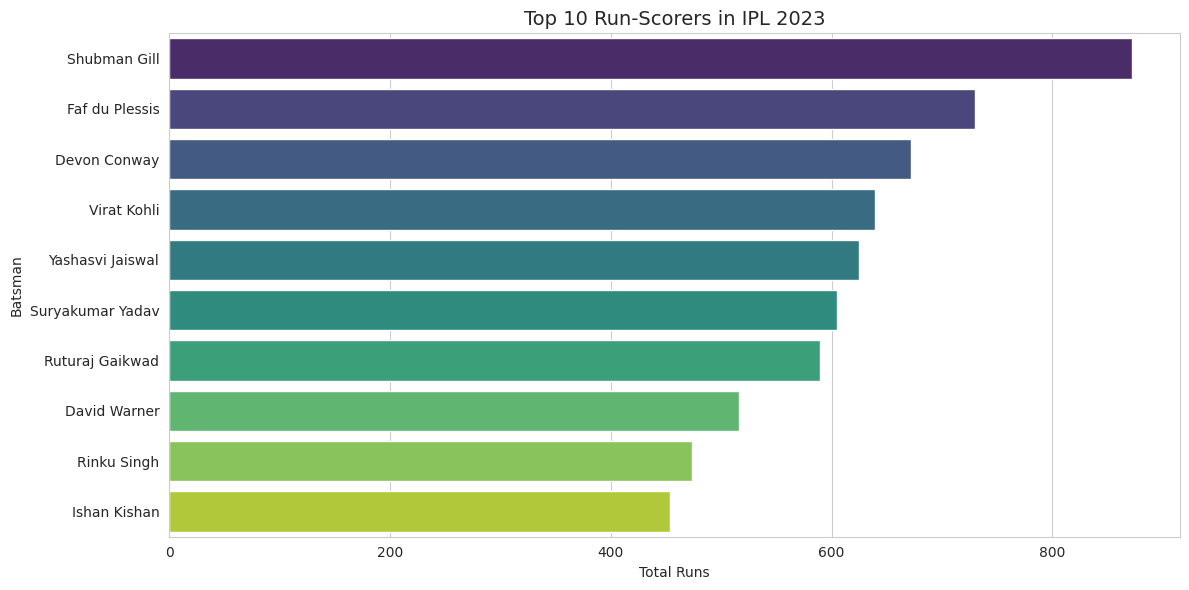

In [12]:
#1.Which batsmen scored the most runs in IPL 2023?
top_scorers = df.groupby("batsmanName")["runs"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="viridis")
plt.title("Top 10 Run-Scorers in IPL 2023", fontsize=14)
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


Conclusion:Shubman Gill scored most no.runs whisch is more than 800

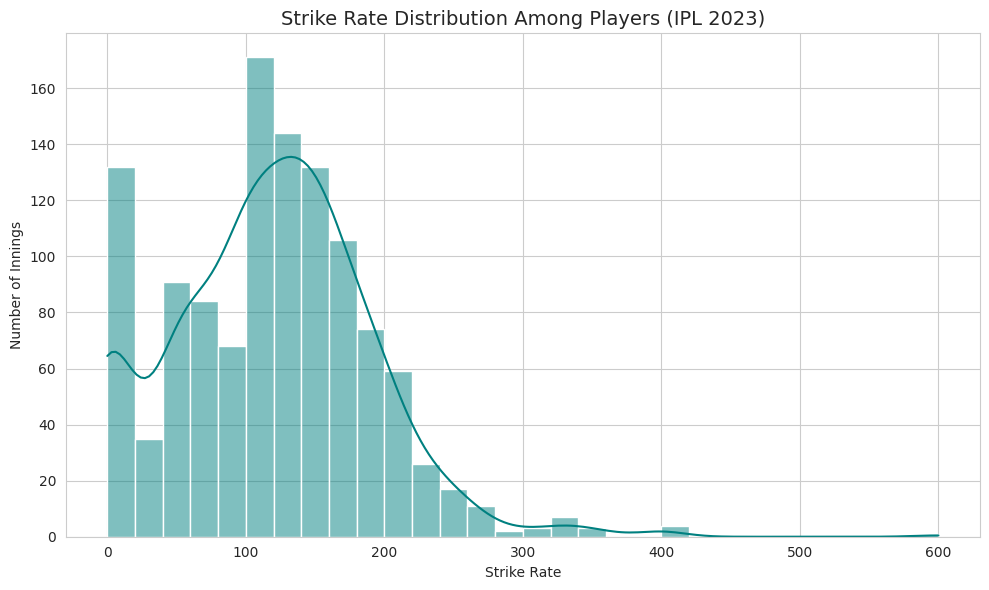

In [13]:
#2.What was the strike rate distribution among players?
df = df.dropna(subset=["SR"])
df["SR"] = pd.to_numeric(df["SR"], errors='coerce')
df = df.dropna(subset=["SR"])
#Histogram
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(df["SR"], bins=30, kde=True, color='teal')

plt.title("Strike Rate Distribution Among Players (IPL 2023)", fontsize=14)
plt.xlabel("Strike Rate")
plt.ylabel("Number of Innings")
plt.tight_layout()
plt.show()

Conclusion:The strike rate of players was highest between 120-140 innings

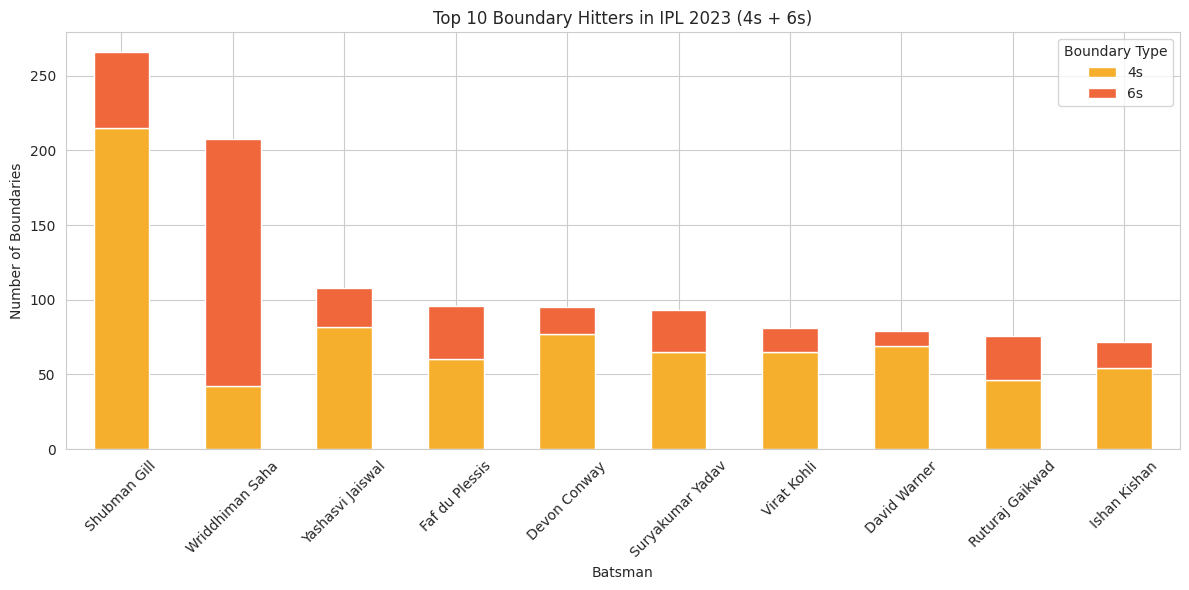

In [15]:
#3.Who were the most aggressive boundary hitters (4s & 6s)?

# Convert to numeric
df["4s"] = pd.to_numeric(df["4s"], errors='coerce')
df["6s"] = pd.to_numeric(df["6s"], errors='coerce')
df = df.dropna(subset=["4s", "6s"])

# Group by batsman and sum boundaries
top_hitters = df.groupby("batsmanName")[["4s", "6s"]].sum()
top_hitters = top_hitters.assign(Total=top_hitters["4s"] + top_hitters["6s"])
top_hitters = top_hitters.sort_values("Total", ascending=False).head(10)

# Plot stacked bar chart
top_hitters[["4s", "6s"]].plot(kind="bar", stacked=True, figsize=(12, 6), color=["#F6AE2D", "#f0673c"])

plt.title("Top 10 Boundary Hitters in IPL 2023 (4s + 6s)")
plt.xlabel("Batsman")
plt.ylabel("Number of Boundaries")
plt.xticks(rotation=45)
plt.legend(title="Boundary Type")
plt.tight_layout()
plt.show()


Conclusion: Shubman Gill was the most aggressive boundary hitter

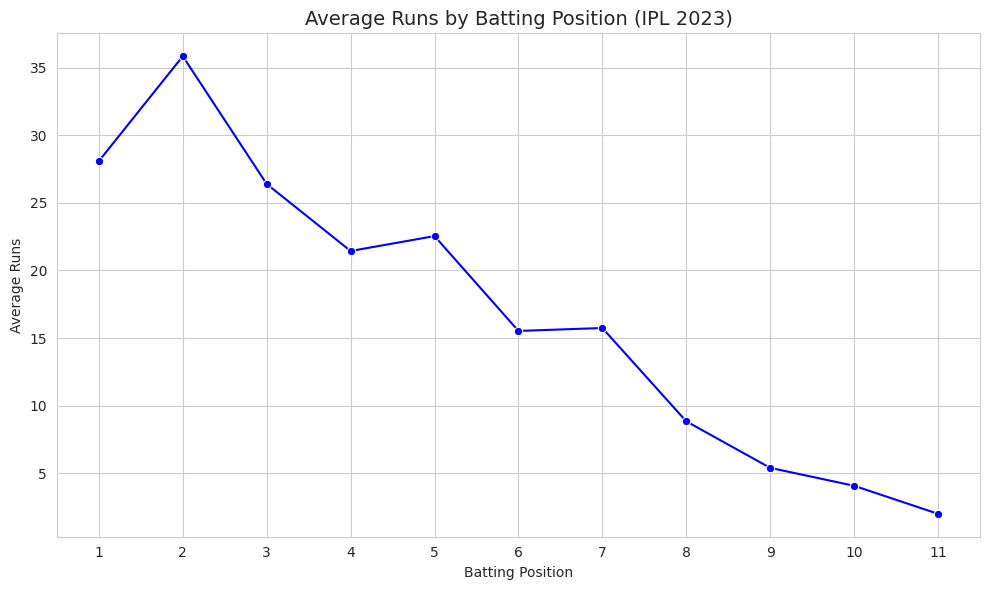

In [19]:
#4.How does batting position affect average runs scored?

# Calculate average runs for each batting position
position_avg = df.groupby("battingPos")["runs"].mean()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=position_avg.index, y=position_avg.values, marker="o", color="blue")

plt.title("Average Runs by Batting Position (IPL 2023)", fontsize=14)
plt.xlabel("Batting Position")
plt.ylabel("Average Runs")
plt.xticks(range(1, 12))
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusion:Openers scored most no.of runs where in tailenders scored least runs

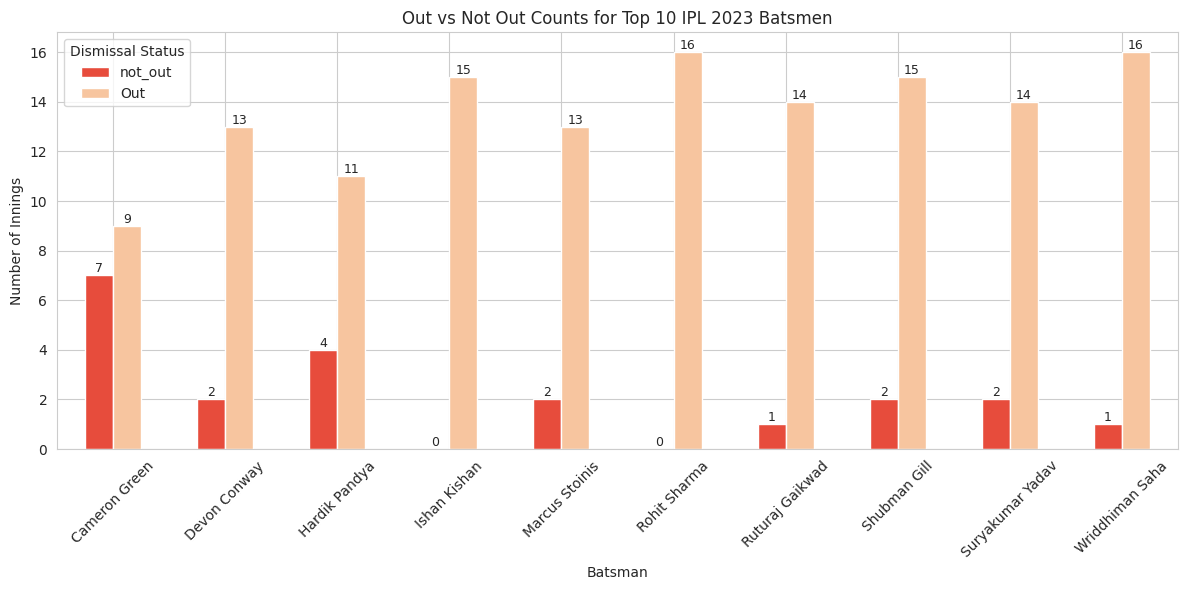

In [27]:
#5.How consistent were players (Out vs Not Out counts)?

# Group & count Out vs Not Out for top 10 batsmen (assuming df already exists and cleaned)
top_players = df["batsmanName"].value_counts().head(10).index
df_top = df[df["batsmanName"].isin(top_players)]

# Count Out vs Not Out
out_stats = df_top.groupby(["batsmanName", "out/not_out"]).size().unstack(fill_value=0)
out_stats = out_stats.rename(columns={"out": "Out", "not out": "Not Out"})

# Plot grouped bar chart
ax = out_stats.plot(kind="bar", figsize=(12, 6), color=["#e74c3c", "#F7C59F"])

plt.title("Out vs Not Out Counts for Top 10 IPL 2023 Batsmen")
plt.xlabel("Batsman")
plt.ylabel("Number of Innings")
plt.xticks(rotation=45)
plt.legend(title="Dismissal Status")
plt.tight_layout()

# Add labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.show()


Conclusion:Rohit Sharma amd Wriddhiman Shah remained not out for maximum innings where in Cameron Green was being out for maximum no.of times.

<ipython-input-69-3f2028a2494e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=team_runs.index, y=team_runs.values, palette="rocket")


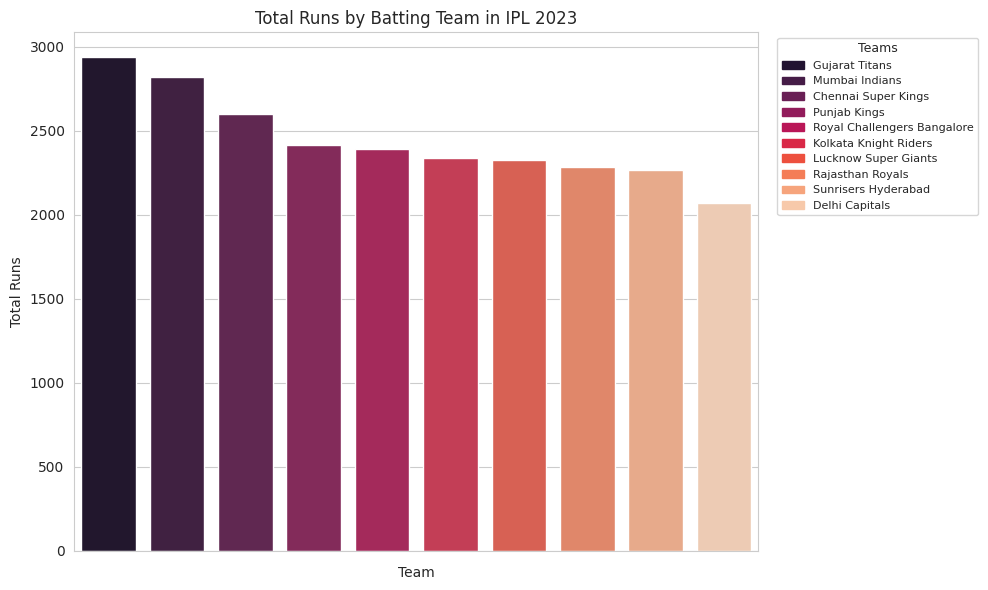

In [69]:
#6.Which team had the highest total contribution from batsmen?

# Group and sort total runs by team
team_runs = df.groupby("teamInnings")["runs"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=team_runs.index, y=team_runs.values, palette="rocket")

# Remove x-axis tick labels
ax.set_xticklabels([])

# Add title and axis labels
plt.title("Total Runs by Batting Team in IPL 2023")
plt.xlabel("Team")
plt.ylabel("Total Runs")

# Add custom legend for team names
handles = [plt.Rectangle((0,0),1,1, color=c) for c in sns.color_palette("rocket", len(team_runs))]
ax.legend(handles, team_runs.index, title="Teams", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, title_fontsize=9)

plt.tight_layout()
plt.show()


Conclusion:Gujrat titans was the top team run scores and Delhi capitals scored least number of runs

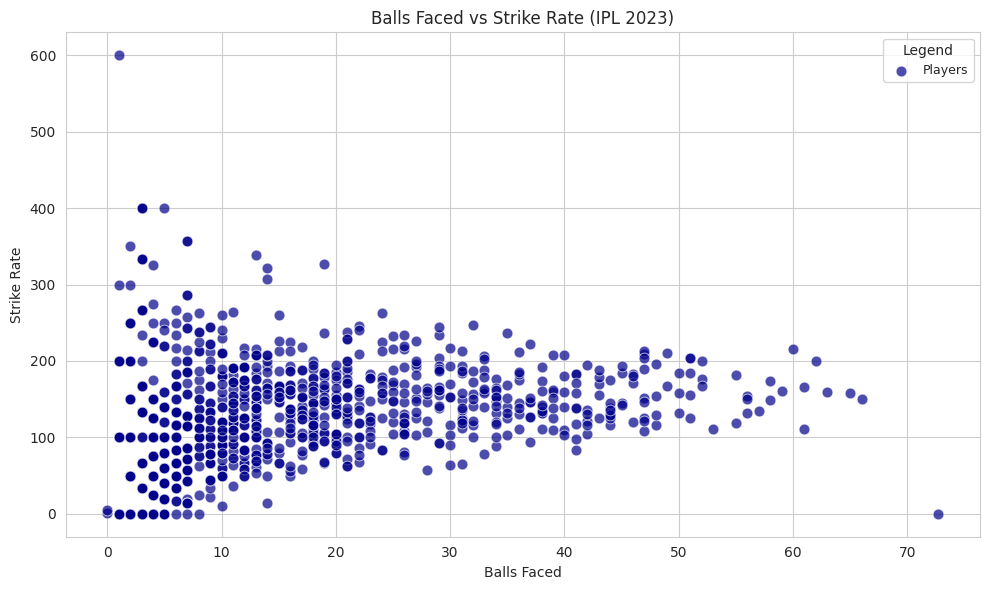

In [70]:

#7. What is the relationship between balls faced and strike rate?

# Clean column names
df.columns = df.columns.str.strip()

# Convert to numeric and drop missing values
df = df.dropna(subset=["balls", "SR"])
df["balls"] = pd.to_numeric(df["balls"], errors="coerce")
df["SR"] = pd.to_numeric(df["SR"], errors="coerce")
df = df.dropna(subset=["balls", "SR"])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="balls", y="SR", alpha=0.7, s=60, color='darkblue', label="Players")

plt.title("Balls Faced vs Strike Rate (IPL 2023)")
plt.xlabel("Balls Faced")
plt.ylabel("Strike Rate")
plt.grid(True)

# Add legend
plt.legend(loc="upper right", title="Legend", fontsize=9)

plt.tight_layout()
plt.show()









Conclusion: Players facing more balls generally have more moderate strike rates

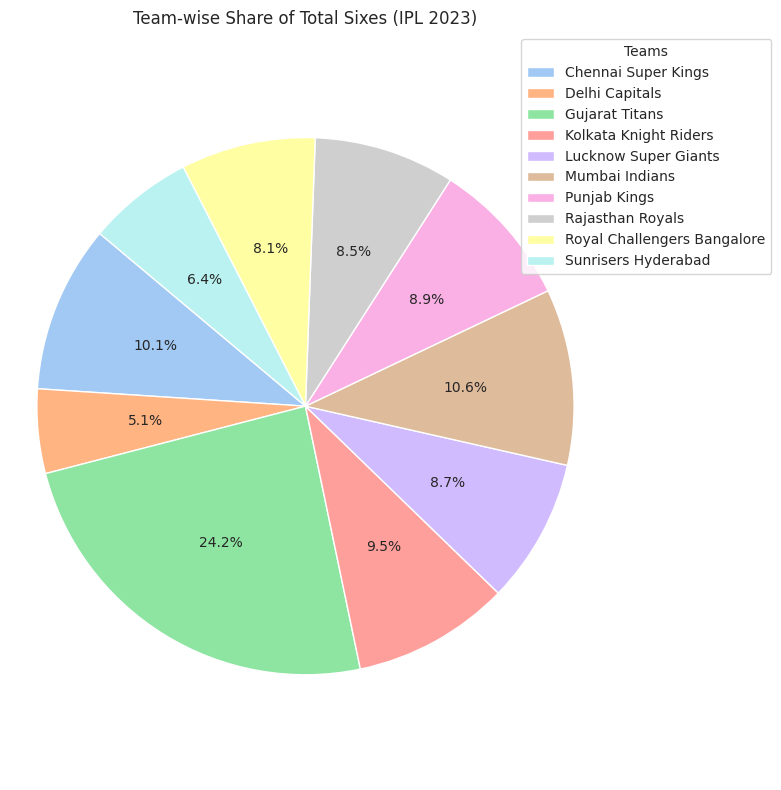

In [45]:
#8.What share of total 6s did each team hit in IPL 2023?

# Clean column names
df.columns = df.columns.str.strip()

# Convert 6s to numeric
df["6s"] = pd.to_numeric(df["6s"], errors="coerce")

# Group total 6s by team
team_sixes = df.groupby("teamInnings")["6s"].sum()

# Plot pie chart with legend top-right
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(team_sixes, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Team-wise Share of Total Sixes (IPL 2023)")
plt.axis("equal")

# Add legend outside top-right
plt.legend(team_sixes.index, title="Teams", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


COnclusion: Gujrat Titanshit maximum no.of sixes and Delhi Captals hit the least amount of sixes

<ipython-input-60-491224133574>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=players_df, x="batsmanName", y="runs", palette="coolwarm")


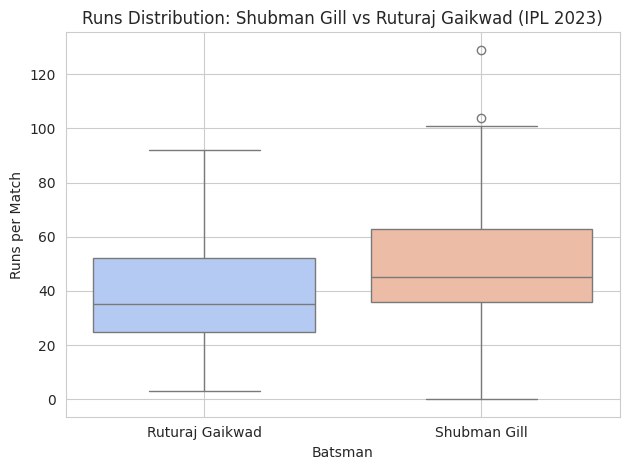

In [60]:
#9. How do Shubman Gill and Ruturaj Gaikwad compare in terms of run consistency across matches
# Clean columns
df.columns = df.columns.str.strip()
df["runs"] = pd.to_numeric(df["runs"], errors="coerce")
df["batsmanName"] = df["batsmanName"].astype(str)

# Filter for the two players
players_df = df[df["batsmanName"].isin(["Shubman Gill", "Ruturaj Gaikwad"])]

# 📊 Box plot
sns.boxplot(data=players_df, x="batsmanName", y="runs", palette="coolwarm")
plt.title("Runs Distribution: Shubman Gill vs Ruturaj Gaikwad (IPL 2023)")
plt.xlabel("Batsman")
plt.ylabel("Runs per Match")
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusion: Shubman gill scored more runs than Ruturaj Gaikwad and Shubman also had some explosive knocks which Ruturaj did not have

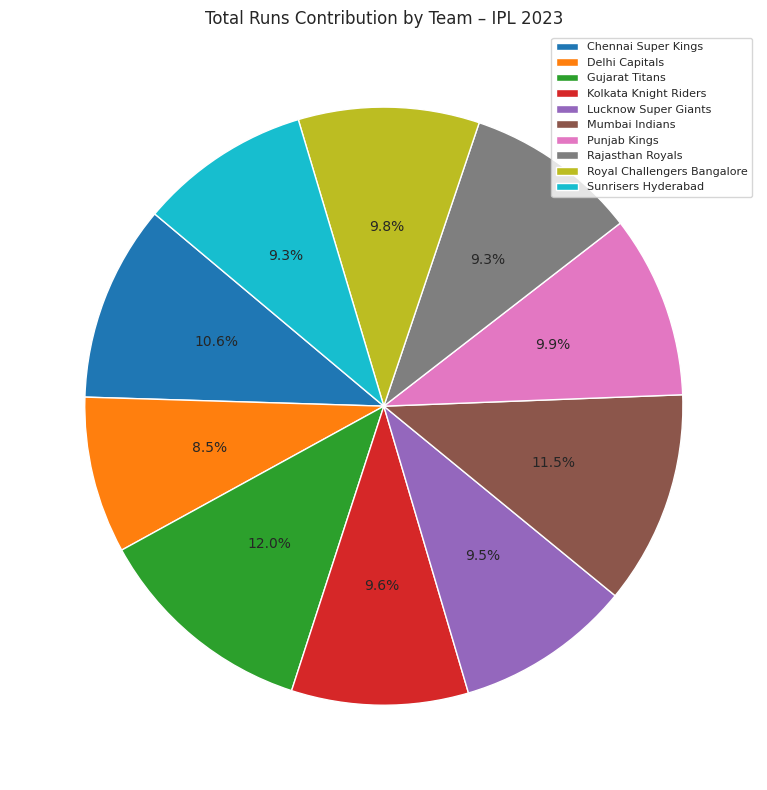

In [67]:
#10. What is each team’s contribution to total runs in IPL 2023
# Clean and prepare data
df.columns = df.columns.str.strip()
df["runs"] = pd.to_numeric(df["runs"], errors="coerce")
df["teamInnings"] = df["teamInnings"].astype(str)

# Group by team and sum runs
team_runs = df.groupby("teamInnings")["runs"].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_runs, labels=None, autopct="%1.1f%%", startangle=140)
plt.title("Total Runs Contribution by Team – IPL 2023")
plt.legend(labels=team_runs.index, loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()



Conclusion: Gujrat Titans contributed the most in total runs and Delhi Captials contributed the least in the whole tournament

Final Conclusion:
🏆 Gujarat Titans were the top batting team with the highest runs and most sixes.

🧊 Delhi Capitals had the lowest batting performance overall.

💥 Shubman Gill was the standout player – highest run-scorer and most aggressive hitter.

⚔️ Gill outperformed Ruturaj Gaikwad in both consistency and explosive innings.

🔝 Openers contributed the most runs; tailenders the least.

🛡️ Rohit Sharma and Wriddhiman Saha were not out most often, showing consistency.

🎯 Cameron Green was dismissed the most times.

🔄 Players who faced more balls generally had lower strike rates.

📈 Most players had strike rates in the 120–140 range.

📊 Teams with stronger top-order batting had better overall performance.